<a href="https://colab.research.google.com/github/satyamvohra03/shipment-delay-predictor/blob/main/day2_eda_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🟦 Shipment Delay Predictor – Day 2

Today we'll dive deeper into Exploratory Data Analysis (EDA) by visualizing patterns in the dataset.

## ✅ Objectives
- Identify missing values
- Compute delay rate by hub
- Visualize relationships using Seaborn/Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving shipment_data.csv to shipment_data.csv


In [3]:
# Load the dataset (ensure it's uploaded to /content/ in Colab)
try:
    df = pd.read_csv('/content/shipment_data.csv')
except FileNotFoundError:
    df = pd.read_csv('shipment_data.csv')

df.head()

,shipment_id,hub,sla_days,distance_km,ship_date,delivery_date,delayed
0,1,Delhi,2,150,2025-06-01,2025-06-03,0
1,2,Mumbai,1,200,2025-06-02,2025-06-04,1
2,3,Bangalore,3,450,2025-06-03,2025-06-05,0
3,4,Delhi,2,100,2025-06-04,2025-06-06,0
4,5,Hyderabad,1,120,2025-06-05,2025-06-07,1


In [4]:
# Check for missing values
df.isna().sum()

,0
shipment_id,0
hub,0
sla_days,0
distance_km,0
ship_date,0
delivery_date,0
delayed,0


In [5]:
# Compute delay rate by hub
delay_by_hub = df.groupby('hub')['delayed'].mean().reset_index()
print(delay_by_hub)

         hub  delayed
0  Bangalore      0.0
1    Chennai      1.0
2      Delhi      0.0
3  Hyderabad      1.0
4     Mumbai      1.0


/tmp/ipython-input-6-1158117938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_hub, x='hub', y='delayed', palette='viridis')


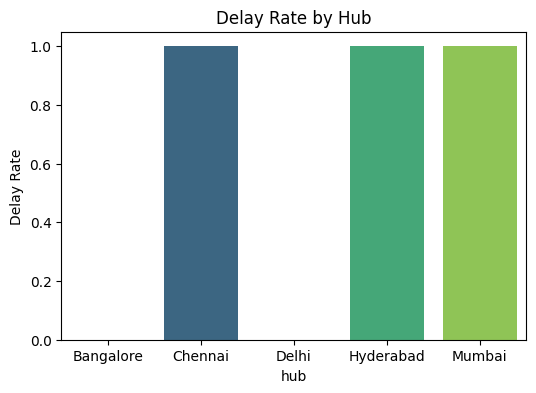

In [6]:
# Bar plot - delay rate by hub
plt.figure(figsize=(6,4))
sns.barplot(data=delay_by_hub, x='hub', y='delayed', palette='viridis')
plt.title('Delay Rate by Hub')
plt.ylabel('Delay Rate')
plt.show()